In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
# loading the stock prices of all companies in a dataframe

#loading the dataset
historical_stock_prices_df=pd.read_csv('C:/Users/aryas_000/Music/Downloads/historical_stock_prices.csv')
historical_stock_prices_df.head()

,ticker,open,close,adj_close,low,high,volume,date
0,AHH,11.50,11.58,8.493155,11.25,11.68,4633900,2013-05-08
1,AHH,11.66,11.55,8.471151,11.50,11.66,275800,2013-05-09
2,AHH,11.55,11.60,8.507822,11.50,11.60,277100,2013-05-10
3,AHH,11.63,11.65,8.544494,11.55,11.65,147400,2013-05-13
4,AHH,11.60,11.53,8.456484,11.50,11.60,184100,2013-05-14


In [3]:
#taking data from 2017-01-01 to 2017-12-31 and preidicting prices for 2018
stocks = historical_stock_prices_df.loc[(historical_stock_prices_df['date']>='2017-01-01') & (historical_stock_prices_df['date']<='2017-12-31')]
stocks

,ticker,open,close,adj_close,low,high,volume,date
6807,CRCM,8.59,8.37,8.370000,8.18,8.60,107500,2017-01-03
6813,CRCM,8.42,8.61,8.610000,8.39,8.65,85500,2017-01-04
6827,CRCM,8.59,8.55,8.550000,8.38,8.62,67000,2017-01-05
6835,CRCM,8.81,8.69,8.690000,8.50,8.81,136600,2017-01-06
6849,CRCM,8.64,8.70,8.700000,8.60,8.77,71800,2017-01-09
...,...,...,...,...,...,...,...,...
20973720,NZF,15.02,15.00,14.441445,14.97,15.02,261900,2017-12-22
20973721,NZF,15.03,15.04,14.479957,14.97,15.05,477600,2017-12-26
20973722,NZF,15.04,15.13,14.566607,15.04,15.14,281700,2017-12-27
20973723,NZF,15.15,15.23,14.662882,15.13,15.23,414800,2017-12-28


In [4]:
training_data=stocks[['adj_close','date']]
training_data

,adj_close,date
6807,8.370000,2017-01-03
6813,8.610000,2017-01-04
6827,8.550000,2017-01-05
6835,8.690000,2017-01-06
6849,8.700000,2017-01-09
...,...,...
20973720,14.441445,2017-12-22
20973721,14.479957,2017-12-26
20973722,14.566607,2017-12-27
20973723,14.662882,2017-12-28


In [5]:
training_set=training_data.values.reshape(-1,1)
training_set1=training_data[['adj_close']]
training_set1

,adj_close
6807,8.370000
6813,8.610000
6827,8.550000
6835,8.690000
6849,8.700000
...,...
20973720,14.441445
20973721,14.479957
20973722,14.566607
20973723,14.662882


In [6]:
scaled = MinMaxScaler(feature_range=(0,1))
training_set_scaled = scaled.fit_transform(training_set1)
training_set_scaled.shape
training_set_scaled.reshape(-1,1)
training_set_scaled.shape

(1294034, 1)

In [7]:
#preprocessing the data
#we will be considering the adjusted closing price for the present day that has to be predicted or forecasted 
#and considering the adjusted closing prices of 60 days prior with respect to which predictions will be made

X_train = []
Y_train = []
period = 60
for i in range(period,len(training_set_scaled)):
    X_train.append(training_set_scaled[i-period:i,0])
    Y_train.append(training_set_scaled[i,0])

In [8]:
X_train=np.array(X_train)
Y_train=np.array(Y_train)

print(X_train.shape)
Y_train.shape


(1293974, 60)


(1293974,)

In [9]:
#perform linear regression on training data
from sklearn import linear_model
regressor = linear_model.LinearRegression()  
regressor.fit(X_train, Y_train) #training the algorithm

LinearRegression()

In [10]:
#genarating test data for making predictions fo year 2018 and ticker AAPL
stocks1 = historical_stock_prices_df.loc[(historical_stock_prices_df['date']>='2018-01-01') & (historical_stock_prices_df['ticker']=='AAPL')]
stocks1

,ticker,open,close,adj_close,low,high,volume,date
99085,AAPL,170.160004,172.259995,170.304230,169.259995,172.300003,25555900,2018-01-02
99097,AAPL,172.529999,172.229996,170.274567,171.960007,174.550003,29517900,2018-01-03
99101,AAPL,172.539993,173.029999,171.065506,172.080002,173.470001,22434600,2018-01-04
99113,AAPL,173.440002,175.000000,173.013123,173.050003,175.369995,23660000,2018-01-05
99117,AAPL,174.350006,174.350006,172.370514,173.929993,175.610001,20567800,2018-01-08
...,...,...,...,...,...,...,...,...
100491,AAPL,218.100006,215.460007,215.460007,215.110001,219.179993,30287700,2018-08-20
100492,AAPL,216.800003,215.039993,215.039993,214.029999,217.190002,26159800,2018-08-21
100493,AAPL,214.100006,215.050003,215.050003,213.839996,216.360001,19018100,2018-08-22
100494,AAPL,214.649994,215.490005,215.490005,214.600006,217.050003,18883200,2018-08-23


In [11]:
testing_data=stocks1[['adj_close','date']]
testing_data

,adj_close,date
99085,170.304230,2018-01-02
99097,170.274567,2018-01-03
99101,171.065506,2018-01-04
99113,173.013123,2018-01-05
99117,172.370514,2018-01-08
...,...,...
100491,215.460007,2018-08-20
100492,215.039993,2018-08-21
100493,215.050003,2018-08-22
100494,215.490005,2018-08-23


In [12]:
testing_set=testing_data.values.reshape(-1,1)
testing_set1=testing_data[['adj_close']]
testing_set1

,adj_close
99085,170.304230
99097,170.274567
99101,171.065506
99113,173.013123
99117,172.370514
...,...
100491,215.460007
100492,215.039993
100493,215.050003
100494,215.490005


In [13]:
scaled = MinMaxScaler(feature_range=(0,1))
testing_set_scaled = scaled.fit_transform(testing_set1)
testing_set_scaled.shape
testing_set_scaled.reshape(-1,1)
testing_set_scaled.shape

(164, 1)

In [14]:
X_test = []
Y_test = []
period = 60
for i in range(period,len(testing_set_scaled)):
    X_test.append(testing_set_scaled[i-period:i,0])
    Y_test.append(testing_set_scaled[i,0])

In [15]:
X_test=np.array(X_test)
Y_test=np.array(Y_test)

print(X_test.shape)
Y_test.shape


(104, 60)


(104,)

In [16]:
Y_pred=regressor.predict(X_test)

In [17]:
Y_pred=Y_pred.reshape(-1,1)

In [18]:
price_pred = scaled.inverse_transform(Y_pred)

In [19]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

3.8246623518372865e-06
[ 1.83395408e-02 -2.14171825e-02  4.11852719e-04  1.90614450e-02
 -2.17504839e-02  2.92318272e-03  1.83266523e-02 -1.40741051e-02
  5.11562907e-03  1.42739894e-02 -2.85303458e-02 -3.53979634e-03
  1.08609109e-02  1.44280167e-03  8.47836035e-03 -2.28736478e-03
 -5.53942712e-03  1.59214388e-02 -9.76732763e-03  1.45401125e-02
  6.72354936e-03 -2.13451531e-02 -4.33868896e-03  3.27719116e-03
 -4.10237938e-03  7.79524775e-03 -1.51319946e-02  1.22301751e-02
  3.31302211e-03  7.04311657e-03 -7.83642584e-03  1.25869665e-02
 -4.28551963e-02 -2.43651175e-03  2.96866772e-03 -1.12892064e-02
  1.26396124e-02 -5.87210185e-03 -9.39297658e-03  7.86670519e-03
  1.58079340e-02  2.90176198e-02 -1.00823422e-02 -5.18199973e-03
 -3.53117485e-03  5.19333125e-03  9.12013804e-03 -1.48520479e-02
  3.61270153e-02 -8.10131418e-02 -5.91760834e-02  1.32090749e-01
  4.52778090e-03 -6.47683537e-02  1.22893363e-01 -4.59931273e-02
  3.36015546e-02  1.71112007e-01  2.93039806e-01  4.35171775e-01]


In [20]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))

Mean Absolute Error: 0.040962643528459214
Mean Squared Error: 0.0031231658295325098
Root Mean Squared Error: 0.05588529171018534


In [21]:
#generating a datframe for actualand predicted prices
df = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': Y_pred.flatten()})
df

,Actual,Predicted
0,0.205057,0.209045
1,0.188046,0.201547
2,0.214490,0.186632
3,0.264285,0.206597
4,0.282688,0.214833
...,...,...
99,0.966974,0.922378
100,0.960431,0.938421
101,0.960587,0.948130
102,0.967441,0.935542


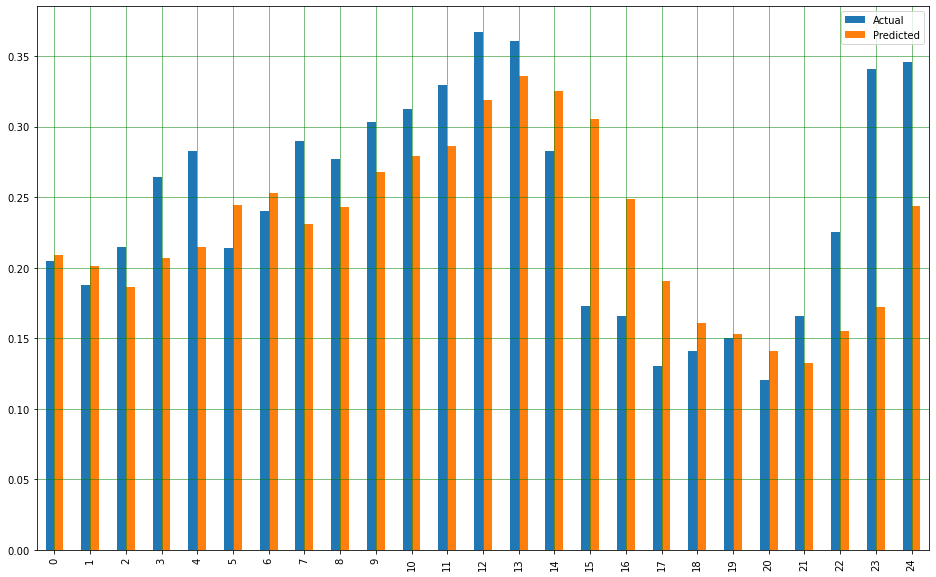

In [22]:
#plotting bar graph for the actual and predicted prices
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

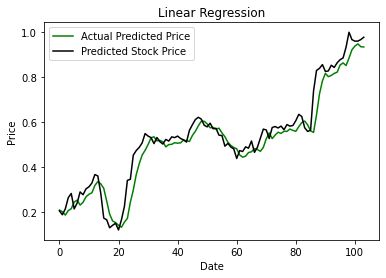

In [23]:
#genearating a plot to compare actual and predicted prices
plt.plot(Y_pred,c='g',label='Actual Predicted Price')
plt.plot(Y_test,c='k',label='Predicted Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Linear Regression')
plt.legend()
plt.plot